# Στοιχεία Ομάδας

Ομάδα Β26

Λεούσης Σάββας Α.M.:03114945

Ζαραβίνος Γεώργιος A.M.:03114158

# Εισαγωγή του EEG Eye State Data Set

![title](https://www.systane.com/globalassets/systane22112/products/product-icons/systane_desktop_icon_contacts01.png)

Όλα τα δεδομένα προέρχονται από μία συνεχή μέτρηση EEG με το Neuroheadset Emotiv. Η διάρκεια της μέτρησης ήταν 117 δευτερόλεπτα. Η κατάσταση των ματιών ανιχνεύθηκε μέσω μιας φωτογραφικής μηχανής κατά τη διάρκεια της μέτρησης και προστέθηκε στο αρχείο μετά την ανάλυση των στιγμιοτύπων του βίντεο. Το '1' υποδεικνύει την κλειστή κατάσταση και το '0' στην ανοιχτή κατάσταση του ματιού. Όλες οι τιμές είναι σε χρονολογική σειρά με την πρώτη μετρημένη τιμή στην κορυφή των δεδομένων.

Αριθμός Δειγμάτων : 14980

Αριθμός Χαρακτηριστικών : 15

Είδος Χαρακτηριστικών : Ακέραιοι, Πραγματικοί

Υπάρχουν μη διατεταγμένα στοιχεία; Όχι

Υπάρχουν επικεφαλίδες; Όχι

Υπάρχουν αριθμίσεις γραμμών; Όχι

Ετικέτες κλάσεων: 1 για 'eye closed', 0 για 'eye open'

Κολώνα (Column) Ετικετών : 15

Χρειάστηκε μετατροπή του αρχείου; Ναι, μετατροπή από arff σε csv και μετά εισαγωγή ως pandas data frame

Υπάρχουν απουσιάζουσες τιμές; Όχι

Αριθμός κλάσεων : 2 (44% 1, 56% 0) "Ισορροπημένο (Balanced)" 

# Data Insertion

In [1]:
from io import StringIO
import requests
import json
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import VarianceThreshold
from sklearn import preprocessing
from imblearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import neighbors
import matplotlib.pyplot as plt
import timeit
!pip install --upgrade imbalanced-learn
from imblearn.over_sampling import RandomOverSampler

Requirement already up-to-date: imbalanced-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages
Requirement already up-to-date: scikit-learn in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages (from imbalanced-learn)
Requirement already up-to-date: numpy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages (from imbalanced-learn)
Requirement already up-to-date: scipy in /gpfs/global_fs01/sym_shared/YPProdSpark/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages (from imbalanced-learn)


In [2]:
# @hidden_cell
# This function accesses a file in your Object Storage. The definition contains your credentials.
# You might want to remove those credentials before you share your notebook.
def get_object_storage_file_with_credentials_9e289a694b4e4211947aea77a54e113a(container, filename):
    """This functions returns a StringIO object containing
    the file content from Bluemix Object Storage."""

    url1 = ''.join(['https://identity.open.softlayer.com', '/v3/auth/tokens'])
    data = {'auth': {'identity': {'methods': ['password'],
            'password': {'user': {'name': 'member_9acbb12bae2d5d4b4c578bba89be1bfee163f0b6','domain': {'id': '83cffb9693bb429285dec914567206dd'},
            'password': 'kn]^thM5vAsWk2gc'}}}}}
    headers1 = {'Content-Type': 'application/json'}
    resp1 = requests.post(url=url1, data=json.dumps(data), headers=headers1)
    resp1_body = resp1.json()
    for e1 in resp1_body['token']['catalog']:
        if(e1['type']=='object-store'):
            for e2 in e1['endpoints']:
                        if(e2['interface']=='public'and e2['region']=='dallas'):
                            url2 = ''.join([e2['url'],'/', container, '/', filename])
    s_subject_token = resp1.headers['x-subject-token']
    headers2 = {'X-Auth-Token': s_subject_token, 'accept': 'application/json'}
    resp2 = requests.get(url=url2, headers=headers2)
    return StringIO(resp2.text)
data_df = pd.read_csv(get_object_storage_file_with_credentials_9e289a694b4e4211947aea77a54e113a('DefaultProjectsavvasleoussisgmailcom', 'EEG_Eye_State.csv'))

In [3]:
labels_df = data_df.iloc[:,14]
features_df = data_df.iloc[:,0:14]

In [4]:
np_labels = labels_df.values
np_features = features_df.values

In [5]:
train, test, train_labels, test_labels = train_test_split(np_features, np_labels, test_size=0.30)

In [6]:
sum = 0
for i in range(0,np_labels.size):
    if (np_labels[i]==1):
        sum+=1
print 'Dataset Balance (1) ≈',sum*100/np_labels.size,'%'
print 'Dataset Balance (0) ≈',100-sum*100/np_labels.size,'%'

Dataset Balance (1) ≈ 44 %
Dataset Balance (0) ≈ 56 %


# Pipeline Transformers-Classifiers

In [7]:
selector = VarianceThreshold()
scaler = StandardScaler()
ros = RandomOverSampler()

dc_uniform = DummyClassifier(strategy="uniform")
dc_constant_0 = DummyClassifier(strategy="constant", constant=0)
dc_constant_1 = DummyClassifier(strategy="constant", constant=1)
dc_most_frequent = DummyClassifier(strategy="most_frequent")
dc_stratified = DummyClassifier(strategy="stratified")
gnb = GaussianNB()
knn = neighbors.KNeighborsClassifier(n_jobs=-1)
mlp = MLPClassifier()

# Dummy Classifiers

In [8]:
eeg_macro = {}
eeg_weighted = {}
eeg_conf = {}
eeg_time = {}
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('uniform (random)', dc_uniform)])
model = pipe.fit(train, train_labels)
preds = pipe.predict(test)
eeg_macro['uniform (random)'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['uniform (random)'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['uniform (random)'] = confusion_matrix(test_labels, preds)
print "~~~uniform (random)"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
eeg_time['uniform (random)']=stop - start 
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('constant 0', dc_constant_0)])
model = pipe.fit(train, train_labels)
preds = pipe.predict(test)
eeg_macro['constant 0'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['constant 0'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['constant 0'] = confusion_matrix(test_labels, preds)
print "~~~constant 0"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
eeg_time['constant 0']=stop - start
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('constant 1', dc_constant_1)])
model = pipe.fit(train, train_labels)
preds = pipe.predict(test)
eeg_macro['constant 1'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['constant 1'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['constant 1'] = confusion_matrix(test_labels, preds)
print "~~~constant 1"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
eeg_time['constant 1']=stop - start 
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('most frequent label', dc_most_frequent)])
model = pipe.fit(train, train_labels)
preds = pipe.predict(test)
eeg_macro['most frequent label'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['most frequent label'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['most frequent label'] = confusion_matrix(test_labels, preds)
print "~~~most frequent label"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
eeg_time['most frequent label']=stop - start 
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('stratified', dc_stratified)])
model = pipe.fit(train, train_labels)
preds = pipe.predict(test)
eeg_macro['stratified'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['stratified'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['stratified'] = confusion_matrix(test_labels, preds)
print "~~~stratified"
print classification_report(test_labels, preds)
stop = timeit.default_timer()
eeg_time['stratified']=stop - start 

print "F1 Macro Scores on the EEG Eye State Dataset (30% test set)\n"
for key, value in sorted(eeg_macro.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)
print "\n"
print "F1 Weighted Scores on the EEG Eye State Dataset (30% test set)\n"
for key, value in sorted(eeg_weighted.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s" % (key, value)
print "\n"
print "Confusion Matrixes on the EEG Eye State Dataset (30% test set)\n"
for key, value in eeg_conf.iteritems():
    print key,"\n"
    print value,"\n"
print "Running Time Of Dummy Classifiers on the EEG Eye State Dataset (30% test set)\n"
for key, value in sorted(eeg_time.iteritems(), key=lambda (k,v): (-v,k)):
    print "%s: %s secs" % (key, value)
print "\n"

~~~uniform (random)
             precision    recall  f1-score   support

          0       0.55      0.48      0.52      2515
          1       0.43      0.50      0.47      1979

avg / total       0.50      0.49      0.49      4494

~~~constant 0
             precision    recall  f1-score   support

          0       0.56      1.00      0.72      2515
          1       0.00      0.00      0.00      1979

avg / total       0.31      0.56      0.40      4494

~~~constant 1
             precision    recall  f1-score   support

          0       0.00      0.00      0.00      2515
          1       0.44      1.00      0.61      1979

avg / total       0.19      0.44      0.27      4494

~~~most frequent label
             precision    recall  f1-score   support

          0       0.56      1.00      0.72      2515
          1       0.00      0.00      0.00      1979

avg / total       0.31      0.56      0.40      4494

~~~stratified
             precision    recall  f1-score   support

 

/gpfs/fs01/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/gpfs/fs01/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gaussian Naive Bayes Classifier

In [9]:
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('Gaussian Naive Bayes', gnb)])
model = pipe.fit(train, train_labels)
preds = pipe.predict(test)
eeg_macro['Gaussian Naive Bayes'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['Gaussian Naive Bayes'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['Gaussian Naive Bayes'] = confusion_matrix(test_labels, preds)
print "~~~Gaussian Naive Bayes"
print classification_report(test_labels, preds)
print "f1_macro:    ",f1_score(test_labels, preds, average='macro')
print "f1_weighted: ",f1_score(test_labels, preds, average='weighted')
print "\n Confusion Matrix: \n",confusion_matrix(test_labels, preds)
stop = timeit.default_timer()
eeg_time['Gaussian Naive Bayes']= stop - start 
print "\n Running Time:",stop - start,"secs" 

~~~Gaussian Naive Bayes
             precision    recall  f1-score   support

          0       0.51      0.03      0.06      2515
          1       0.44      0.96      0.60      1979

avg / total       0.48      0.44      0.30      4494

f1_macro:     0.330041217742
f1_weighted:  0.2974849147

 Confusion Matrix: 
[[  76 2439]
 [  72 1907]]

 Running Time: 0.038341999054 secs


# kNN Classifier

## Default kNN

In [10]:
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('kNN', knn)], memory = 'tmp')
pipe.fit(train, train_labels)
preds = pipe.predict(test)
stop = timeit.default_timer()
eeg_macro['Default kNN'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['Default kNN'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['Default kNN'] = confusion_matrix(test_labels, preds)
print "~~~Default kNN"
print classification_report(test_labels, preds)
print "f1_macro:    ",f1_score(test_labels, preds, average='macro')
print "f1_weighted: ",f1_score(test_labels, preds, average='weighted')
print "\n Confusion Matrix: \n",confusion_matrix(test_labels, preds)
eeg_time['Default kNN']= stop - start
print "\n Running Time:",stop - start,"secs" 

~~~Default kNN
             precision    recall  f1-score   support

          0       0.92      0.89      0.90      2515
          1       0.86      0.90      0.88      1979

avg / total       0.89      0.89      0.89      4494

f1_macro:     0.89187948462
f1_weighted:  0.893173630704

 Confusion Matrix: 
[[2232  283]
 [ 198 1781]]

 Running Time: 5.18159604073 secs


In [11]:
print pipe

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=5, p=2,
           weights='uniform'))])


## Optimized kNN

In [12]:
K = [1, 5, 10, 20, 30, 40]
#metrics = ['euclidean','manhattan','chebyshev','minkowski','wminkowski','seuclidean','mahalanobis']
weight = ['uniform','distance']
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('kNN', knn)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(kNN__n_neighbors=K,kNN__weights=weight), scoring='f1_macro', n_jobs=-1,cv=5)
estimator.fit(train, train_labels)
preds = estimator.predict(test)
stop = timeit.default_timer()
eeg_macro['Optimized kNN'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['Optimized kNN'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['Optimized kNN'] = confusion_matrix(test_labels, preds)
print "~~~Optimized kNN"
print classification_report(test_labels, preds)
print "f1_macro:    ",f1_score(test_labels, preds, average='macro')
print "f1_weighted: ",f1_score(test_labels, preds, average='weighted')
print "\n Confusion Matrix: \n",confusion_matrix(test_labels, preds)
eeg_time['Optimized kNN']= stop - start
print "\n Running Time:",stop - start,"secs" 

~~~Optimized kNN
             precision    recall  f1-score   support

          0       0.92      0.92      0.92      2515
          1       0.89      0.90      0.90      1979

avg / total       0.91      0.91      0.91      4494

f1_macro:     0.90772077165
f1_weighted:  0.909011435728

 Confusion Matrix: 
[[2306  209]
 [ 200 1779]]

 Running Time: 59.9187600613 secs


In [13]:
print estimator.best_estimator_

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform'))])


# MLP Classifier

## Default MLP

In [21]:
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('MLP', mlp)],memory='tmp')
pipe.fit(train, train_labels)
preds = pipe.predict(test)
stop = timeit.default_timer()
eeg_macro['Default MLP'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['Default MLP'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['Default MLP'] = confusion_matrix(test_labels, preds)
print "~~~Default MLP"
print classification_report(test_labels, preds)
print "f1_macro:    ",f1_score(test_labels, preds, average='macro')
print "f1_weighted: ",f1_score(test_labels, preds, average='weighted')
print "\n Confusion Matrix: \n",confusion_matrix(test_labels, preds)
eeg_time['Default MLP']= stop - start
print "\n Running Time:",stop - start,"secs" 

/gpfs/fs01/user/s08a-9082e10dd730b1-6f702ff6845a/.local/lib/python2.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


~~~Default MLP
             precision    recall  f1-score   support

          0       0.90      0.88      0.89      2515
          1       0.85      0.87      0.86      1979

avg / total       0.88      0.88      0.88      4494

f1_macro:     0.87593514201
f1_weighted:  0.877538669455

 Confusion Matrix: 
[[2215  300]
 [ 251 1728]]

 Running Time: 152.773239136 secs


In [22]:
print pipe

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio='auto')), ('MLP', MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, ear...=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False))])


## Optimized MLP

In [ ]:
layer_size=[100,150,200]
solvers=['lbfgs','adam']
start = timeit.default_timer()
pipe = Pipeline(steps=[('selector', selector), ('scaler', scaler), ('sampler', ros), ('MLP', mlp)], memory = 'tmp')
estimator = GridSearchCV(pipe, dict(MLP__hidden_layer_sizes=(layer_size,),MLP__solver=solvers), scoring='f1_macro', n_jobs=-1,cv=5)
estimator.fit(train, train_labels)
preds = estimator.predict(test)
stop = timeit.default_timer()
eeg_macro['Optimized MLP'] = f1_score(test_labels, preds, average='macro')
eeg_weighted['Optimized MLP'] = f1_score(test_labels, preds, average='weighted')
eeg_conf['Optimized MLP'] = confusion_matrix(test_labels, preds)
print "~~~Optimized MLP"
print classification_report(test_labels, preds)
print "f1_macro:    ",f1_score(test_labels, preds, average='macro')
print "f1_weighted: ",f1_score(test_labels, preds, average='weighted')
print "\n Confusion Matrix: \n",confusion_matrix(test_labels, preds)
eeg_time['Optimized MLP']= stop - start
print "\n Running Time:",stop - start,"secs" 

In [15]:
print estimator.best_estimator_

Pipeline(memory='tmp',
     steps=[('selector', VarianceThreshold(threshold=0.0)), ('scaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('sampler', RandomOverSampler(random_state=None, ratio='auto')), ('kNN', KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=-1, n_neighbors=1, p=2,
           weights='uniform'))])


             F1 Macro Scores


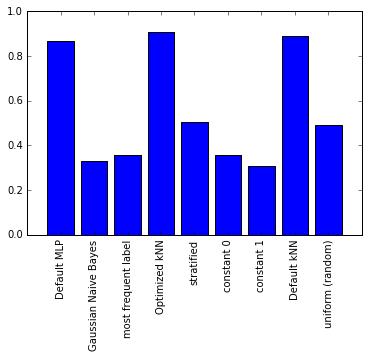

             F1 Weighted Scores


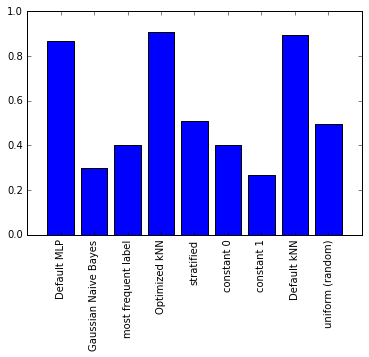

             Running Time (secs)


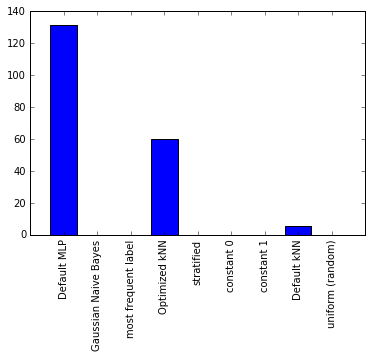

In [16]:
plt.bar(range(len(eeg_macro)), eeg_macro.values(), align='center')
plt.xticks(range(len(eeg_macro)), eeg_macro.keys(), rotation=90)
print "             F1 Macro Scores"
plt.show()

plt.bar(range(len(eeg_weighted)), eeg_weighted.values(), align='center')
plt.xticks(range(len(eeg_weighted)), eeg_weighted.keys(), rotation=90)
print "             F1 Weighted Scores"
plt.show()

plt.bar(range(len(eeg_time)), eeg_time.values(), align='center')
plt.xticks(range(len(eeg_time)), eeg_time.keys(), rotation=90)
print "             Running Time (secs)"
plt.show()

In [17]:
print "kNN Optimization Percentage (macro)    :",(eeg_macro['Optimized kNN']-eeg_macro['Default kNN'])/eeg_macro['Default kNN']*100,"%"
print "kNN Optimization Percentage (weighted) :",(eeg_weighted['Optimized kNN']-eeg_weighted['Default kNN'])/eeg_macro['Default kNN']*100,"%"
print "\n"
print "MLP Optimization Percentage (macro)    :",(eeg_macro['Optimized MLP']-eeg_macro['Default MLP'])/eeg_macro['Default MLP']*100,"%"
print "MLP Optimization Percentage (weighted) :",(eeg_weighted['Optimized MLP']-eeg_weighted['Default MLP'])/eeg_macro['Default MLP']*100,"%"

kNN Optimization Percentage (macro)    : 1.77616901194 %
kNN Optimization Percentage (weighted) : 1.7757785998 %




#### Σχολιασμός Αποτελεσμάτων

Παραπάνω φαίνονται τα αποτελέσματα για όλους τους classifiers, δηλαδή τους dummy, τον Gaussian Naive Bayes, τον kNN και τον MLP. Όπως φαίνεται, ο kNN είναι ο καλύτερος ταξινομητής και στις 2 μετρικές απόδοσης που χρησιμοποιούμε (F1 Macro Scores και F1 Weighted Scores). Ανάμεσα στις 2 μετρικές δεν παρατηρούμε σχεδόν καθόλου διαφορές. Από τους dummy ταξινομητές, ο uniform(random) είναι ο καλύτερος και αμέσως μετά βρίσκεται ο stratified. Φυσικά, όπως και στο πρώτο notebook, αυτό δεν μας βοηθάει να βγάλουμε σημαντικά συμπεράσματα αφού αυτοί οι classifiers είναι dummy. Εδώ πρέπει να πούμε πως και ο Gaussian Naive Bayes είναι πολύ “κακός” στις προβλέψεις του, κάτι που φαίνεται και από τον Confusion Matrix. Σε αυτό το dataset μάλιστα φαίνεται να βρίσκεται πολύ κοντά (ακόμα και χαμηλότερα) στους dummy classifiers, γεγονός που τον καθιστά “άχρηστο” για την μελέτη μας.

Οι ταξινομητές που μας ενδιαφέρουν πραγματικά είναι ο kNN και ο MLP και φυσικά οι Optimized versions αυτών. Κοιτώντας τα στατιστικά τους αποτελέσματα βλέπουμε ότι ο kNN είναι ο καλύτερος classifier και όπως είναι λογικό, οι Optimized υλοποιήσεις των 2 ταξινομητών δίνουν ελαφρώς καλύτερα αποτελέσματα. Αυτό φαίνεται και στα ποσοστά αλλά και στον πίνακα του Confusion Matrix όπου μπορούμε να δούμε τα ακριβή λάθη που κάνει κάθε ταξινομητής.

Τέλος, συγκρίνοντας τους χρόνους εκτέλεσης των ταξινομητών βλέπουμε πως όπως είναι λογικό πως αυτοί των dummy classifiers καθώς και του Gaussian είναι σχεδόν μηδενικοί. Αντίθετα, οι άλλοι 2 ταξινομητές αργούν πάρα πολύ γιατί ο estimator του GridSearchCV δοκιμάζει όλους τους classifiers για κάθε πιθανό συνδιασμό υπερ-παραμέτρων. Μάλιστα φαίνεται και η σημαντική διαφορά σε χρόνο μεταξύ των default και των optimized υλοποιήσεων η οποία είναι λογική λόγω της λειτουργίας GridSearchCV που μόλις περιγράψαμε. 